# Matplotlib and Seaborn

Matplotlib is a powerful tool that can be used to create advanced plots. Visualization using Matplotlib generally consists of bars, pies, lines, scatter plots and so on.
<br>Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
In this spotlight I aim to show the versatility of these two tools and how they can help in visualizing and analyzing the data sets.



## Table of Contents
 1. [Data Visualization](#data)
    <br>a. [Univariate Analysis](#univariate)
    <br>b. [Bivariate Analysis](#bivariate)
    <br>c. [Analysis of Categorical Variables](#categorical)
 2. [Conclusion](#conclusion)
 3. [References](#references)

<a id = 'data'></a>
## Data Visualization 
Data are the actual pieces of information that you collect through your study. Most of the data fall into one of the two categories:
1. **Numerical** : These data have meaning as a measurement, such as a person’s height, weight, IQ, or blood pressure; or they’re a count, such as the number of stock shares a person owns, how many teeth a dog has, or how many pages you can read of your favorite book before you fall asleep

2. **Categorical**: A categorical variable (sometimes called a nominal variable) is one that has two or more categories, but there is no intrinsic ordering to the categories.  For example, gender is a categorical variable having two categories (male and female) 

Data Visualization is the first and foremost step where you will get a high level statistical overview on how the data is. It has become very important as organizations nowadays collect a huge amount of data and visualizations are the easiest way to analyze and absorb information. Visuals help to easily understand the complex problem. They help in identifying patterns, relationships, and outliers in data.
<br>In this document I will discuss about two types of data analysis:
1. **Univariate Analysis**: Considers one feature/random variable/attribute at a time
2. **Bivariate Analysis**: It involves the analysis of two variables, for the purpose of determining the empirical relationship between them.

We fisrt look at how numerical variables can be analysed taking a single feature and then two features at a time

<a id = 'univariate'></a>
### Univariate Analysis

Univariate analysis doesn’t deal with causes or relationships (unlike regression) and it’s major purpose is to describe data. It takes the data, summarizes it and finds patterns in the data. Distribution plots is useful for Univariate anlysis where we can visually assess how the data points are distributed with respect to its frequency.
<br>Usually the data points are grouped into bins and the height of the bars representing each group increases with increase in the number of data points lie within that group. Its called **"Histogram"**.<br>It is used to inspect the underlying frequency distribution (eg. Normal distribution), outliers, skewness

<br>Lets consider the iris dataset. The Iris flower data set consists of 50 samples from each of three species of Iris Flowers — Iris Setosa, Iris Virginica and Iris Versicolor. Iris data is a multivariate data set. Four features are measured from each sample are — sepal length, sepal width, petal length and petal width, in centimeters. Here I show how we can use Distribution plots to identify features that can be used distinguish between different species.

Plotting the histograms of each of the three types of flowers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

col=['sepal_length','sepal_width','petal_length','petal_width','species']
iris = pd.read_csv("iris.csv",names=col)
iris_setosa = iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]

/Users/kamalakshitha/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


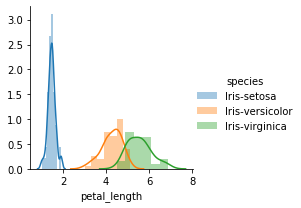

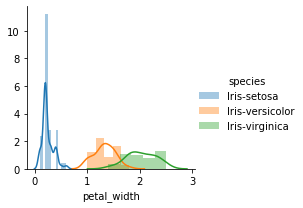

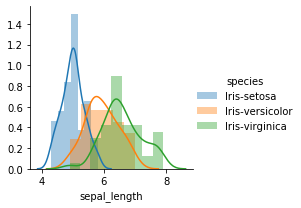

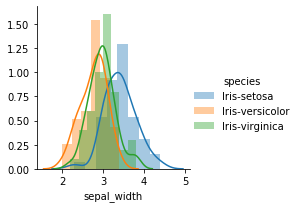

In [2]:
sns.FacetGrid(iris,hue="species",size=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(iris,hue="species",size=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(iris,hue="species",size=3).map(sns.distplot,"sepal_length").add_legend()
sns.FacetGrid(iris,hue="species",size=3).map(sns.distplot,"sepal_width").add_legend()
plt.show()

We can observe the following from histograms above:
1. By using petal length we can separate iris-setosa
2. Sepal length, Sepal width are not good features because the distributions of the different species overlap
3. Petal width is an acceptable feature but it does not have as clear a distribution as petal length

Based on these observations we can choose features that can be helpful in classification of species. 
One feature can be petal length. If we need two features, then we will choose petal width as well, but to get more clarity on which combination features to choose, we can look at scatter plots and pair-plots. I will discuss this in detail in the Bivariate analysis section.  

<a id = 'bivariate'></a>
### Bivariate Analysis

Bivariate data can be analysed with the help of scatter plots.
<br>Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another. 
<br>A scatterplot is a helpful tool in determining the strength of the relationship between two numeric variables.
It can also be useful for identifying patterns in data. We can divide data points into groups based on how closely sets of points cluster together. 
<br>Scatter plots can also show if there are any unexpected gaps in the data and if there are any outlier points. This can be useful if we want to segment the data into different parts. Let us see how a scatter plot can be used to obtain important insights from the iris-dataset.

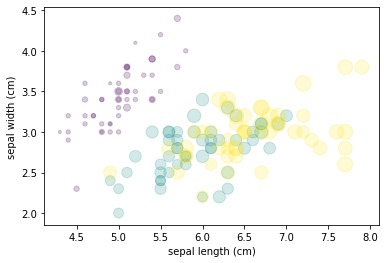

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

We can see that this scatter plot has given us the ability to simultaneously explore four different dimensions of the data:
1. The x location of each point corresponds to the sepal length
2. The y location of each point corresponds to the sepal width
3. The size of the point is related to the petal width
4. The color is related to the particular species of flower 
<br>Multicolor and multifeature scatter plots like this can be useful for both exploration and presentation of data.

Lets take boston housing dataset as another example. It contains 506 samples that describes a Boston suburb or town, and it has 14 features such as average number of rooms per dwelling, pupil-teacher ratio, and per capita crime rate. The median price of owner-occupied homes is what we are trying to predict when we use it for regression tasks. 

In [4]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()
boston['MEDV'] = boston_dataset.target

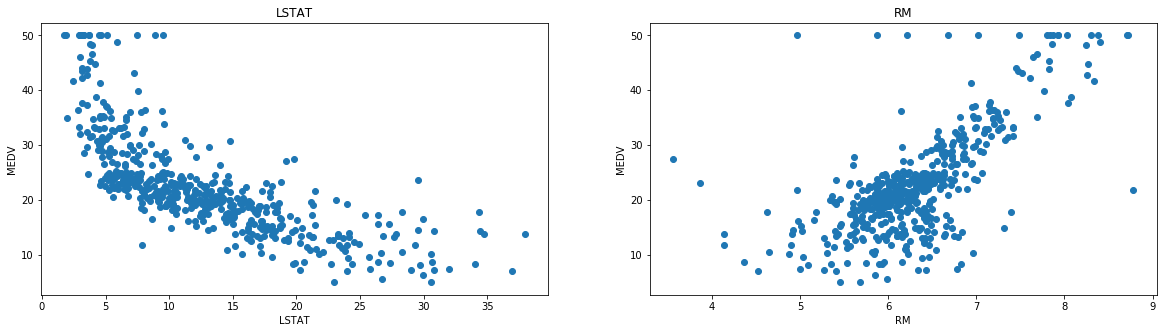

In [5]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

By looking at scatter plots we can see that RM (average number of rooms) has a strong positive correlation (increasing trend) with MEDV(price) which indicates as the number of rooms increases the price of house increases.
<br>Where as LSTAT (lower status of popultaion) has a negative correlation (decreasing trend) with MEDV which indicates that the prices of house decreases in areas with lower status population.
This visualization enables us to understand how each feature affects the target variable just by looking at the scatter plots.

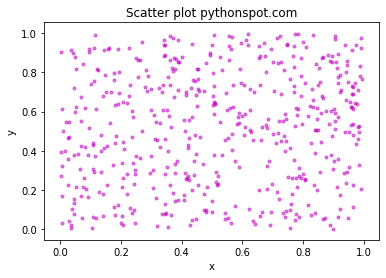

In [6]:
N = 500
x = np.random.rand(N)
y = np.random.rand(N)
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, c='m', alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Just to contrast, here we have taken two random variables x and y, we can see how a scatter plot does not show any clear clusters or noticeable trends.

Linear regression is a powerful statistical data analysis technique that attempts to model the relationship between a dependent and an independent variable by fitting a linear equation to observed data. 
If there appears to be no association between the independant and dependent variables (i.e., the scatterplot does not indicate any increasing or decreasing trends), then fitting a linear regression model to the data probably will not provide anything useful. So before attempting to fit a linear model to observed data, one should first determine whether or not there is a relationship between the variables of interest. And, scatter plots are ideal to examine this relationship and help understand how strongly the two variables correlate with each other.

Identifying Outliers:
Scatter plots can also be used to identify if there are any outliers in our dataset.

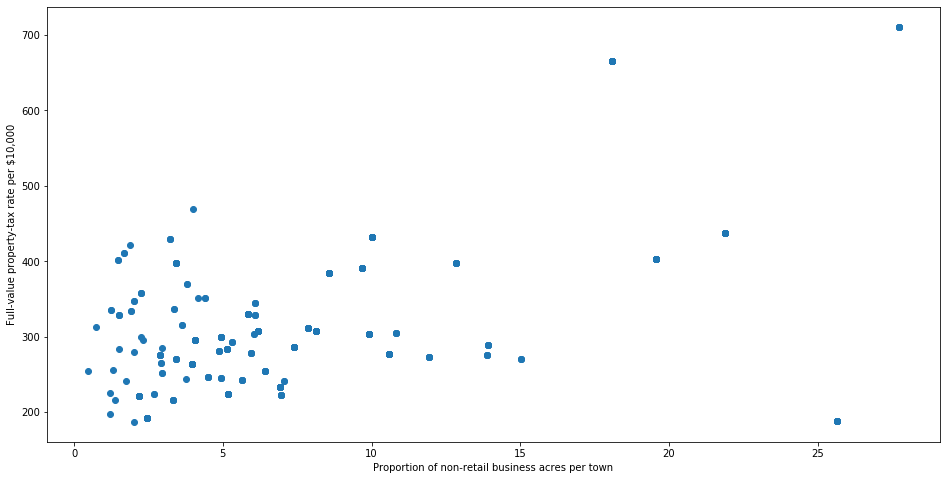

In [7]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston['INDUS'], boston['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

The plot above models the relationship between two features of boston housing dataset, property tax and number of non-retail business acres. We can see most of data points are lying bottom left side but there are points which are far from the population like top right corner(outliers).
<br> The significance of outliers is their ability to manipulate the model estimates. It is always worth it to look for outliers and decide to keep them or exclude them.

To plot multiple pairwise bivariate distributions in a dataset, we use the pairplot() function. This creates a matrix of axes and shows the relationship for each pair of features in a Dataset. By default, it also draws the univariate distribution of each variable on the diagonal Axes

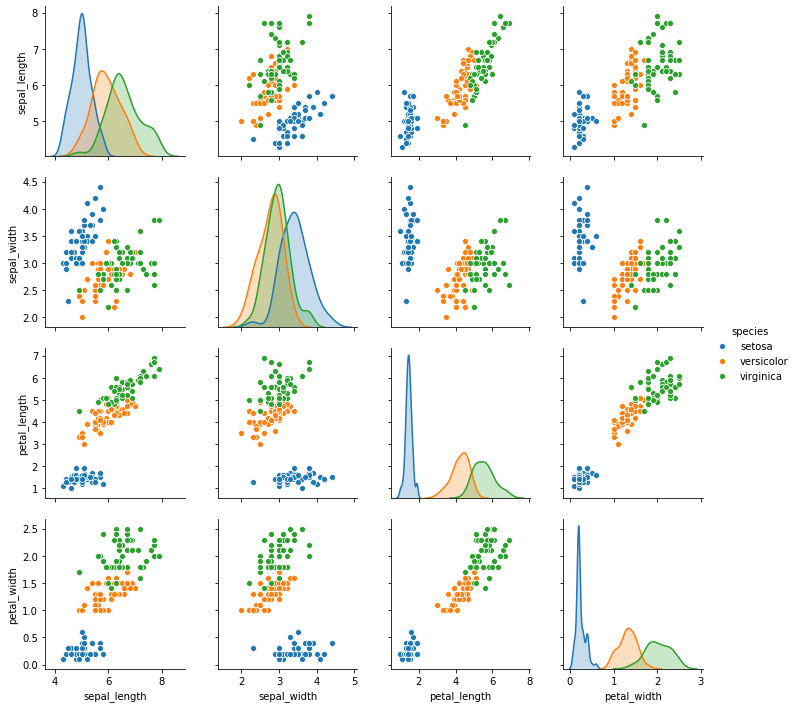

In [8]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species");

We decided one feature to be petal-length from the histograms above and from pair plots we can conclude petal-width to be the second feature.

The seaborn library also provides a joint plot function that is really handy to make marginal plot.
A marginal plot allows to study the relationship between 2 numeric variables. 
<br>The central chart display their correlation. It is usually a scatterplot, a hexbin plot, a 2D histogram or a 2D density plot. The marginal charts, usually at the top and at the right, show the univariate distribution of each variable using histogram or kernel density plot.

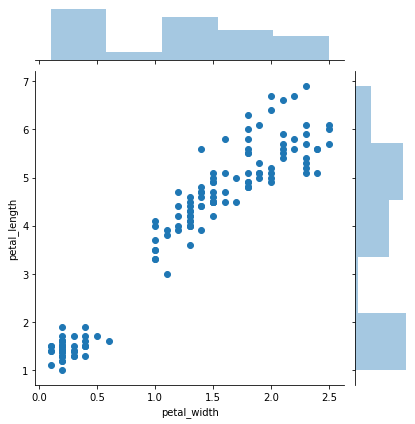

In [9]:
sns.jointplot("petal_width", "petal_length", data=iris);

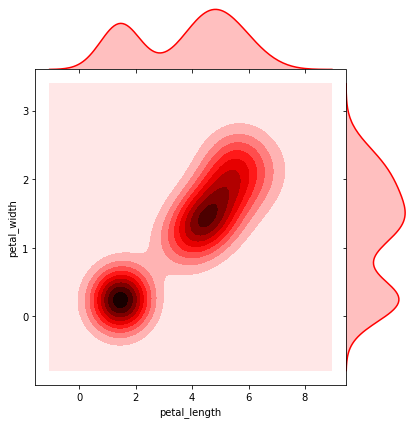

In [10]:
iris = sns.load_dataset("iris")
g = sns.jointplot("petal_length", "petal_width", data=iris, kind="kde", space=0, color="r")


Scatter plots can be useful in determining the number of clusters in a dataset. Lets create a random dataset with four clusters.

(-15, 15)

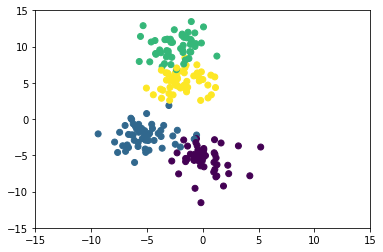

In [11]:
# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)
# create np array for data points
points = data[0]
# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

<a id = 'categorical'></a>
### Analysis of Categorical Variables

Standard scatter and line plots visualize relationships between **numerical variables**, but many data analyses involve **categorical variables**. 
<br>There are several specialized plot types in seaborn that are optimized for visualizing this kind of data. They can be accessed through catplot(). The idea of catplot() is that it exposes a common dataset-oriented API that generalizes over different representations of the relationship between one numeric variable and one (or more) categorical variables.

<br>These representations offer different levels of granularity in their presentation of the underlying data. At the finest level, you may wish to see every observation by drawing a scatter plot that adjusts the positions of the points along the categorical axis so that they don’t overlap.

Consider the energy consumption of 600 houses for three consecutive days. If we need to plot a figure between the quantitative variable (energy consumed (in kWh)) and the qualitative variable (days (Mon, Tue, Wed)), then we can proceed with the catplot method. 
<br>The catplot method by default doesn't distinguish between the overlapping values. However, to observe the number of duplicate records, we can pass an argument **kind=swarm** to the catplot method so that it adds some jitter to the duplicate values and helps to distinguish them.

In [12]:
np.random.seed(42)
energy = np.linspace(50, 400, 200, dtype=int)
np.random.shuffle(energy)
energy = np.concatenate((energy, energy, energy))
np.random.shuffle(energy)

# Building a dataset
data = pd.DataFrame({'Days': ['Mon']*200 + ['Tue']*200 + ['Wed']*200,
                    'Energy': energy})
data.head()

,Days,Energy
0,Mon,143
1,Mon,171
2,Mon,71
3,Mon,132
4,Mon,123


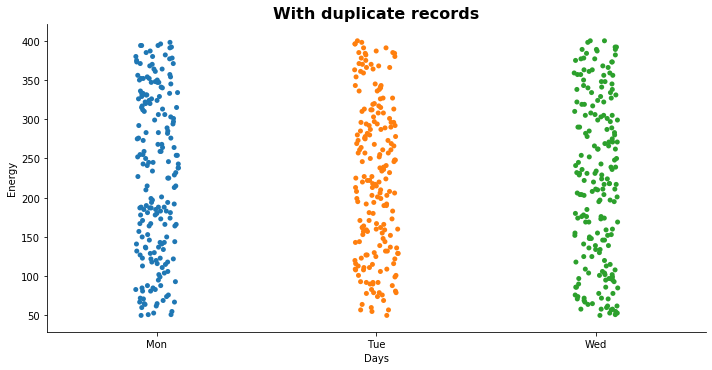

In [13]:
sns.catplot(x='Days', y='Energy', data=data, aspect=2)
plt.title('With duplicate records', weight='bold', fontsize=16)
plt.show()

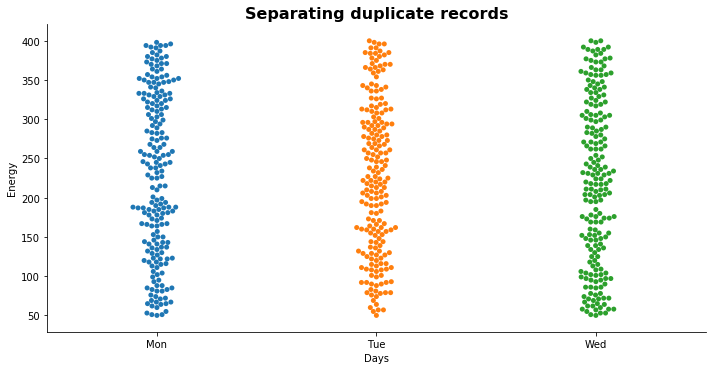

In [14]:
sns.catplot(x='Days', y='Energy', data=data, kind='swarm', aspect=2)
plt.title('Separating duplicate records', weight='bold', fontsize=16)
plt.show()

We can even create a specific visualization based on certain criteria. For instance, say out of 600 houses, 280 houses have more than five family members. We can separate such 280 houses in our visualization using the hue argument

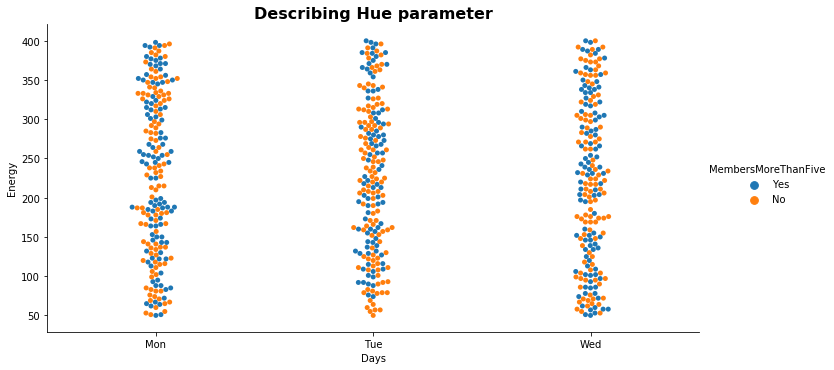

In [15]:
# Allocating 280 houses randomly with more than five members
members = np.array(['Yes']*280 + ['No']*320)
np.random.seed(42)
np.random.shuffle(members)

# Adding data back to the dataset
data['MembersMoreThanFive'] = members

# Plotting
sns.catplot(x='Days', y='Energy', data=data, kind='swarm', hue='MembersMoreThanFive', aspect=2)
plt.title('Describing Hue parameter', weight='bold', fontsize=16)
plt.show()

<a id = 'conclusion'></a>
## Conclusion

For any application, be it regression, classification or clustering, data analysis is the first step. Univariate, bi-variate and analysis helps in understanding the relation between variables and feature importance. In this spotlight I have explained the different applications of Matplotlib and Seaborn specifically for Data Visualization. I have shown how we can perform Univariate and Bivariate analysis using different publicly available data sets. I have also  shown how Categorical Variables can also be visualized using the given tools.


<a id = 'references'></a>
### References:
1. http://cs229.stanford.edu/notes/cs229-notes1.pdf 
2. https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
3. https://pythonspot.com/matplotlib-scatterplot/
4. https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html
5. https://nikkimarinsek.com/blog/7-ways-to-label-a-cluster-plot-python
6. https://www.pluralsight.com/guides/plotting-categorical-data